# Introducción


En este cuaderno, se resolverá el [TPC01 - Conceptos Básicos](http://materias.df.uba.ar/scytda2020c1/files/2020/04/TC01_ConceptosBasicos.pdf). En el mismo se podrán leer los resultados de los ejercicios, el código implementado para la resolución y comentarios sobre las tareas realizadas.
Para cada ejercicio, se requiere trabajar con una base de datos distinta. Algunas redes están dadas por archivos .txt; otras, vienen como archivos .gml. 
[Aquí un enlace a los datos](http://materias.df.uba.ar/scytda2020c1/files/2020/04/TC01_data.zip). Para poder ejecutar el archivo, deben estar subidos al directorio del cuaderno donde se lo abre para poder cargarlo. 


Importamos las librerías generales a utilizar: Networkx para análisis de redes y Matplotlib para graficar las mismas. Para algunos ejercicios se requeire Numpy para funciones matemáticas y Pandas para crear DataFrames. Las mismas se importan en el inciso correspondiente. 

Para las redes en formato .txt se crea función para abrirlas, mientras que Networkx se encarga de abrir las .gml

In [3]:
#importamos las librerías generales a utilizar
import networkx as nx 
import matplotlib.pylab as plt 

#creamos función para abrir .txt
def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    return data

# Ejercicio 1
La idea de este ejercicio es indagar en algunas de las características topológicas principales de tres redes de interacción de proteínas de la levadura de cerveza.

## Inciso (a)
En este inciso, queremos simplemente visualizar las tres redes. Primero, necesitamos generarnos las redes a partir de las listas de enlaces obtenidas de la lectura de los .txt. Luego, podemos generar las visualizaciones con Networkx.

Para poder acceder a la data de manera ordenada vamos a crear un diccionario de diccionarios ("data"), allí pondremos un diccionario correspondiente a cada red con sus datos topológicos. En data[nombre_red]["Grafo"] está el objeto red de Networkx. 

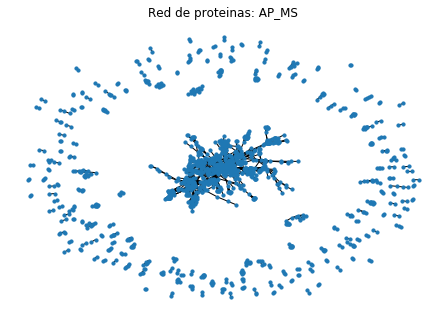

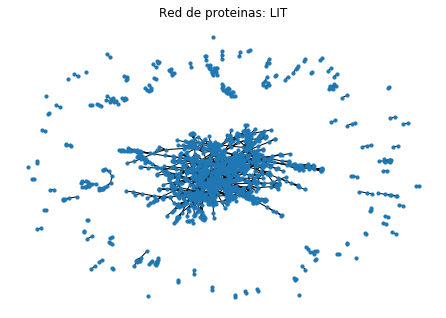

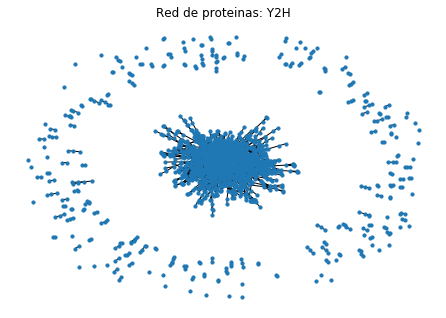

In [4]:
redes = {'AP_MS': './data_01/yeast_AP-MS.txt', 
         'LIT': './data_01/yeast_LIT.txt',
         'Y2H': './data_01/yeast_Y2H.txt'}

data = {}

for i, red in enumerate(redes.keys()):
    lista_de_enlaces_i = abrir_txt(redes[red])
    Red_proteinas_i = nx.Graph()
    Red_proteinas_i.add_edges_from(lista_de_enlaces_i)
    data[red] = {}
    data[red]["Grafo"] = Red_proteinas_i
    nx.draw(Red_proteinas_i, node_size = 10)
    plt.title(f"Red de proteinas: {red}")
    plt.show()


## Inciso (b)
En este inciso buscamos comparar características topológicas de las redes. Para lo mismo creamos un diccionario de diccionarios. Es decir, guardamos en "data" un diccionario para cada red con sus características. Escribimos una función que consigue los atributos pertinentes de cada red. A la función se le pasa la red y calcula características guardándolas en el diccionario.


In [8]:
def get_red_info(data_dict):
    red = data_dict['Grafo']
    data_dict['Nodos'] = red.number_of_nodes() 
    data_dict['Enlaces'] = red.number_of_edges()
    data_dict['Grado medio'] = 2 * data_dict['Enlaces'] / data_dict['Nodos']
  
    grados = red.degree() # devuelve grado de cada nodo, como tupla
    grado_max = 0 #inicializo en cero
    grado_min = float('inf') #inicializo en infinito
    for nodo in grados:
        if (nodo[1]) > grado_max:
            grado_max = nodo[1]
        if (nodo[1]) < grado_min:
            grado_min = nodo[1]
            
    data_dict['Grado max'] = grado_max
    data_dict['Grado min'] = grado_min
    data_dict['Densidad'] = nx.density(red)

    componentes=[red.subgraph(componente) 
                      for componente in sorted(nx.connected_components(red), 
                                               key=len, reverse=True)]
    comp_gigante = componentes[0]
    data_dict['Tamaño componente gigante']=comp_gigante.number_of_nodes()
    data_dict['Diametro'] = nx.diameter(comp_gigante)
    data_dict['Clustering medio'] = nx.average_clustering(red)
    data_dict['Clustering delta'] = nx.transitivity(red) #fraction of all possible triangles present in graph
    data_dict['Porcentaje tamaño CG']= str(comp_gigante.number_of_nodes()/red.number_of_nodes()*100) + "%"
    data_dict['Porcentaje interacciones CG']= str(comp_gigante.number_of_edges()/red.number_of_edges() *100) + "%"


Calculamos para cada red de proteínas. 

In [9]:
get_red_info(data['AP_MS'])
get_red_info(data['LIT'])
get_red_info(data['Y2H'])

Ejemplo de cómo acceder a la data, en este caso grado mínimo de la red LIT.

In [8]:
#Ejemplo de como ver la data
data['LIT']['Grado min']

1

Para mejor visualización de los datos, creamos un DataFrame de Pandas para las tres redes. 

In [16]:
import pandas as pd

df = pd.DataFrame(data)
#df.round(1)
df.drop('Grafo', axis=0) #no queremos la red


,AP_MS,LIT,Y2H
Clustering delta,0.61859,0.346193,0.0236142
Clustering medio,0.554636,0.292492,0.046194
Densidad,0.00689927,0.00248117,0.0014397
Diametro,15,19,14
Enlaces,9070,2925,2930
Grado max,127,40,91
Grado medio,11.1837,3.80859,2.90387
Grado min,1,1,1
Nodos,1622,1536,2018
Porcentaje interacciones CP,91.71995589856671%,89.60683760683762%,91.53583617747441%


## Inciso (c)

#### Y2H

La componente gigante representa las células de levadura donde hubo una interaccion entre las proteínas unidas al dominio activador y al dominio de unión. Esto facilita a que el dominio activador se acerque efectivamente a las regiones reguladoras de los genes reporteros para desencadenar el proceso de transcripción al cual se les asociara un cambio fenotípico. 
El proceso de transcripción requeire de una cadena de interacciones de distintas proteias para poder ocurrir. Por lo tanto es razonable que represente el 91.5% del total de las interacciones, ya que el 8.5% restante representa a las células en las que falló la interacción de las dos proteínas y el dominio activador no se podra acercar.
Por otro lado, la densidad tiene que ver la relación entre las conexiones potenciales y las reales. La densidad de la componente grande no es considerablemente mayor que la de la red total ya que las interacciones son más bien en cadena.
Esta forma de interactuar se puede evidenciar también en los coeficiente de Clustering. 

#### AP MS
En este método se utilizan dos técnicas para poder medir las interacciones entre proteinas. El primero y principal es la cromatografía: donde a las columnas de anticuerpos se van a adherir los complejos proteicos para deshacerse de todo lo que no es de interés. 
Para medir las interacciones se utilizan redes bipartitas, ya que luego se las somete a un espectrómetro de masas en el cual se mide las proteínas adheridas a cada anticuerpo.
Por esto mismo es razonable deducir que tanto los coeficientes de clustering como la densidad van a ser significativamente mayores a los de los otros métodos. 
Este fenómeno se ve reflejado también en la diferencia entre los porcentajes de tamaño y enlaces de la componente grande, la cual es significativamente mayor que en los otros dos métodos.


#### LIT
Esta técnica para visualizar las intercciones se basa en el datamining de arículos académicos. Se busca la coaparición de un par de proteinas en un paper. A este método se le puede asociar un error poco despreciabe, ya que dos proteinas pueden aparecer en un mismo artículo sin necesariamente interactuar, o hasta se puede estar negando que lo hacen y sin embargo las enlaza. 
Es interesante notar que el porcentaje de los nodos y los enlaces que no se encuentran en la componente grande es parecido al del método Y2H. Esto puede tener que ver a que para ambas técnicas los nodos que no son parte de la componente grande son de interacciones fallidas u errores del mining en el segundo caso. es decir, son los errores estadísticos de las técnicas Y2H y LIT.

## Inciso d


In [18]:
#https://python-graph-gallery.com/venn-diagram/
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
    
def venn_3(a,b,c,labelA,labelB,labelC):
    abc= a.intersection(b).intersection(c)
    ab= a.intersection(b).difference(abc)
    ac= a.intersection(c).difference(abc)
    bc= b.intersection(c).difference(abc)

    #defino nuevos a_,b_ y c_
    a_=a.difference(b.union(c))
    b_=b.difference(a.union(c))
    c_=c.difference(b.union(a))

    # Import the library


    # Custom text labels: change the label of group A
    v=venn3(subsets = (len(a_), len(b_), len(ab), len(c_),len(ac),len(bc),len(abc)), set_labels = (labelA, labelB, labelC))
    plt.show()
    return([len(a_), len(b_), len(c_),len(ab),len(ac),len(bc),len(abc)])

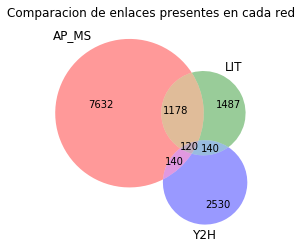

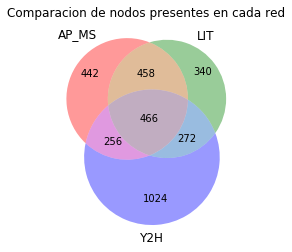

In [19]:
enlaces={}
nodos={}
for red in data:
    Red_proteinas=data[red]['Grafo']
    #Guardo enlaces y nodos en un set para poder hacer comparaciones facilmente
    enlaces[red], nodos[red] = set(), set()
    for nodo in Red_proteinas.nodes(): nodos[red].add(nodo)
    #Como los enlaces son NO dirigidos, los ordeno los nodos del enlace antes de guardarlo
    for enlace in Red_proteinas.edges(): enlace=sorted(enlace);enlaces[red].add((enlace[0],enlace[1]))

plt.title('Comparacion de enlaces presentes en cada red')
r_enlaces=venn_3(enlaces['AP_MS'],enlaces['LIT'],enlaces['Y2H'],"AP_MS","LIT","Y2H")

plt.title('Comparacion de nodos presentes en cada red')
r_nodos=venn_3(nodos['AP_MS'],nodos['LIT'],nodos['Y2H'],"AP_MS","LIT","Y2H")

In [20]:
import numpy as np
import pandas as pd

comparacion={}
i=0
for red in data:
    comparacion[red]={}
    comparacion[red]['Nodos (%)']=str(round(100*data[red]['Nodos']/np.sum(r_nodos),2))
    comparacion[red]['Enlaces (%)']=str(round(100*data[red]['Enlaces']/np.sum(r_enlaces),2))
    comparacion[red]['Nodos unicos (%)']=str(round(100*r_nodos[i]/np.sum(r_nodos),2))
    comparacion[red]['Enlaces unicos (%)']=str(round(100*r_enlaces[i]/np.sum(r_enlaces),2))
    i+= 1
comparacion['Interseccion']={}
comparacion['Interseccion']['Nodos (%)']=str(round(100*r_nodos[6]/np.sum(r_nodos),2))
comparacion['Interseccion']['Enlaces (%)']=str(round(100*r_enlaces[6]/np.sum(r_enlaces),2))
comparacion['Interseccion']['Nodos unicos (%)']='-'
comparacion['Interseccion']['Enlaces unicos (%)']='-'

pd.DataFrame(comparacion)

,AP_MS,LIT,Y2H,Interseccion
Enlaces (%),68.57,22.11,22.15,0.91
Enlaces unicos (%),57.7,11.24,19.13,-
Nodos (%),49.79,47.15,61.94,14.3
Nodos unicos (%),13.57,10.44,31.43,-


# TO-DO
Analizar datos sobre cobertura (comparten nodos) y especificidad (comparten enlaces) y sobre la interseccion
Anotar raro LIT

466


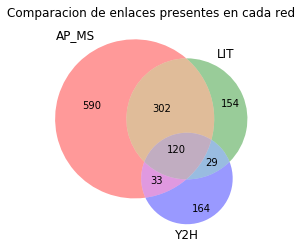

In [22]:
#De los nodos que coinciden, quiero ver si reportan los mismos enlaces:
nodos_interseccion= nodos['AP_MS'].intersection(nodos['LIT']).intersection(nodos['Y2H'])

print(len(nodos_interseccion))


interseccion={}
enlaces={}
nodos={}
for red in data:
    Red_proteinas=data[red]['Grafo']
    Red_proteinas_interseccion=Red_proteinas.subgraph(nodos_interseccion)
    
    #Guardo enlaces y nodos en un set para poder hacer comparaciones facilmente
    enlaces[red], nodos[red] = set(), set()
    for nodo in Red_proteinas_interseccion.nodes(): nodos[red].add(nodo)
    #Como los enlaces son NO dirigidos, los ordeno los nodos del enlace antes de guardarlo
    for enlace in Red_proteinas_interseccion.edges(): enlace=sorted(enlace);enlaces[red].add((enlace[0],enlace[1]))

plt.title('Comparacion de enlaces presentes en cada red')
r_enlaces_interseccion=venn_3(enlaces['AP_MS'],enlaces['LIT'],enlaces['Y2H'],"AP_MS","LIT","Y2H")



De las 466 proteinas sobre las cuales las tres redes aportan informacion, hay un total de 1392 interacciones reportadas, de las cuales 120 son reportadas por todas las redes. Tomando como medida de coherencia el porcentaje de interacciones en comun de las reportadas sobre esta muestra de enlaces de las 466 proteinas, podemos decir que la coherencia de las tres redes es de 8.62%.

Si en cambio tomaramos la coherencia como el porcentaje de enlaces en comun sobre el total de enlaces, tendriamos una coherencia de 0.91%.

# Ejercicio 2
En este ejercicio se busca estudiar una población de delfines y tratar de entender cómo son los vínculos entre dicha población y si dichos vínculos tienen que ver con el sexo de los delfines. Basicamente, queremos entender si la población de delfines es homofílica. La red social es no direccionada. 



## Inciso (a)
La idea de este inciso es explorar las distintas posibilidades de layout que nos otorga networkx en función de determinar cuál es la mejor para dar cuenta de la estructura subyacente a la red.
Existen múltilpes layouts, lprobaremos cuatro compatibles con la red: 'spring' (por default), 'random', 'circle', 'spectral'.

Otros layouts como 'bipartite' o 'planar' no son compatibles con la estructura de la red a estudiar.

La red delfines no tiene atributos de género. Lo primero que hacemos es crear la red desde el .gml y crearle un diccionario con los delfines como keys y su género como value. Visualizaremos las redes con los colores correspondientes a cada uno. 

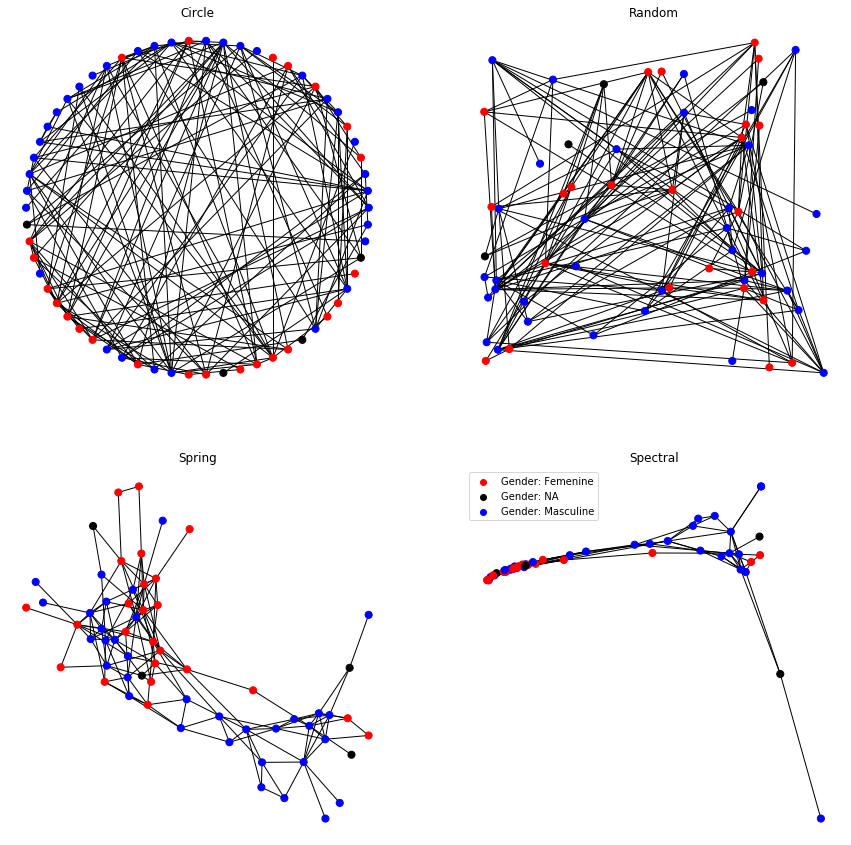

In [30]:
Red_delfines = nx.read_gml('./data_01/dolphins.gml')
dolphins_gender = abrir_txt('./data_01/dolphinsGender.txt')
gender_dict = dict(dolphins_gender)
nx.set_node_attributes(Red_delfines, gender_dict, 'gender')

node_color = []

for node in Red_delfines.nodes(data=True):
    if 'm' in node[1]['gender']:
        node_color.append('blue')
    
    elif 'f' in node[1]['gender']:
        node_color.append('red')
    
    elif 'NA' in node[1]['gender']:
        node_color.append('black')


f, axs = plt.subplots(2, 2, figsize=(15,15))
axs = axs.flatten()

nx.draw_circular(Red_delfines, node_size= 50, ax = axs[0], node_color=node_color)
axs[0].set_title("Circle")

nx.draw_random(Red_delfines, node_size= 50, ax = axs[1], node_color=node_color)
axs[1].set_title("Random")

nx.draw(Red_delfines, node_size= 50, ax = axs[2], node_color=node_color) #default
axs[2].set_title("Spring")

nx.draw_spectral(Red_delfines, node_size= 50, ax = axs[3], node_color=node_color)
axs[3].set_title("Spectral")


label = {'blue': 'Masculine', 'red':'Femenine', 'black':"NA"}
for color in set(node_color):
    plt.scatter([],[], c = color, label='Gender: {}'.format(label[color]))

plt.legend()
plt.show()

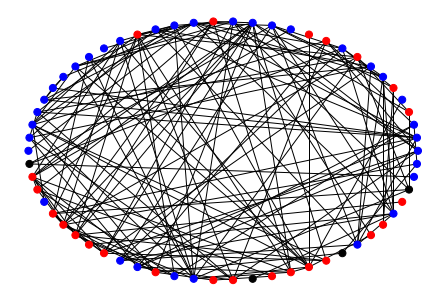

In [8]:
Red = Red_delfines.copy()
new_dict = {}
for k in sorted(gender_dict, key=gender_dict.get):
    k, gender_dict[k]
    new_dict[k] = gender_dict[k]

nx.set_node_attributes(Red, new_dict, 'gender')

node_color = []

for node in Red_delfines.nodes(data=True):
    if 'm' in node[1]['gender']:
        node_color.append('blue')
    
    elif 'f' in node[1]['gender']:
        node_color.append('red')
    
    elif 'NA' in node[1]['gender']:
        node_color.append('black')


nx.draw_circular(Red, node_size= 50,  node_color=node_color)



Veamos algunas características de cada layout para decidir la mejor visualización. 
* **Circular**: una de las ventajas de un layout circular es la _neutralidad_. Todos los vértices están a igual distancias y no tienen posición privilegiada. Sería de interes ordenar los nodos por género en la circunferencia.

* **Spring** es una representación "force-directed". Se trata los enlaces como resortes y los nodos como objetos que se repelen. Se busca el equilibrio (minimizar la energía). 

* **Spectral** 


## Inciso (b)
El objetivo de este inciso es ver si hay _homofilia_ en la variable género. Es decir, analizar la fracción de enlaces, sobre el total, que vincule delfines del mismo sexo. Se pueden contar los enlaces que vinculan macho con macho y los de hembra con hembra.

Para poder comprender la significancia de la cantidad (si este valor es grande o chico) necesitamos compararlo. Para eso se repite el cálculo sobre redes aleatorias. 

Pero enteniendo aleatoriedad en el sentido de romper algunas de las relaciones existentes en la red real pero no todas. Acá realizamos dos tipos: primero asignamos los géneros aleatoriamente entre los delfines, utilizando la distribución real de géneros. Otra posibilidad es recablear la red, manteniendo la distirbución de grado intacta.



Primero calculamos la cantidad de enlaces entre delfines de género masculino y femenino en la red real. Para lo mismo calculamos la matriz según atributos.

In [34]:
enlaces_original = nx.attr_matrix(Red_delfines, node_attr='gender', rc_order = ['f', 'm', 'NA'])
pares_fm = int(enlaces_original[0,1]) #correspondiente a fem-masc, análogo a [1][0] masc-fem

print(f'Matriz de enlaces: \n {enlaces_original} \n')
print(f'Cantidad de pares entre genero femenino y masculino en la red original: {pares_fm}')


Matriz de enlaces: 
 [[36. 52.  4.]
 [52. 60.  7.]
 [ 4.  7.  0.]] 

Cantidad de pares entre genero femenino y masculino en la red original: 52


Generamos redes aleatorias, pero cambiando al azar los géneros. Para ese fin reordenamos al azar (con la libería random) los géneros. Hicimos el reordenamiento 10000 veces y nos fijamos en cada iteración la cantidad de enlaces entre femenino-masculino. Los resultados se ven en el histograma realizado.

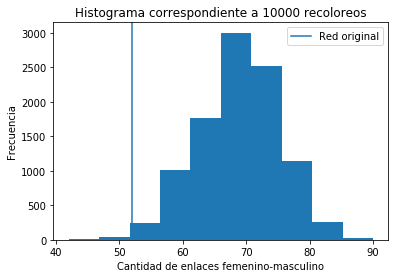

In [35]:
import random

new_net = Red_delfines.copy() #evita cambiar la original
new_gender = gender_dict.copy()
keys = list(new_gender.keys())
new_gender_fm = []

i = 0
times = 10000
while i < times: 
  
    new_keys = random.sample(keys, len(keys))
    new_gender_dict = dict(zip(new_keys, new_gender.values()))
    nx.set_node_attributes(new_net, new_gender_dict, 'gender')
    enlaces_mezcla = nx.attr_matrix(new_net, node_attr='gender',
                                  rc_order = ['f', 'm', 'NA'])
    new_gender_fm.append(enlaces_mezcla[0,1])
    i = i + 1

plt.figure()
plt.hist(new_gender_fm)
plt.xlabel('Cantidad de enlaces femenino-masculino')
plt.ylabel('Frecuencia')
plt.title(f'Histograma correspondiente a {times} recoloreos')
plt.axvline(pares_fm, label = 'Red original')
plt.legend()
plt.show()

Luego, recableamos la red manteniendo el grado de cada nodo. Para lo mismo cambiamos entre pares de nodos. Hicimos lo mismo 10000 veces.

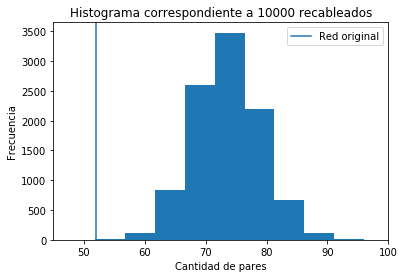

In [36]:
pares_de_enlaces_a_cambiar = 0.2*Red_delfines.number_of_edges()
Red_mezclada = Red_delfines.copy() #evita cambiar la original

times = 10000
i = 0
new_pares_fm = []

while i < times:
    Red_mezclada = nx.double_edge_swap(Red_mezclada, nswap=pares_de_enlaces_a_cambiar, max_tries=100)
    enlaces_mezcla = nx.attr_matrix(Red_mezclada, node_attr='gender', rc_order = ['f', 'm', 'NA'])
    new_pares_fm.append(enlaces_mezcla[0,1])
    i = i + 1

plt.figure()
plt.hist(new_pares_fm)
plt.xlabel('Cantidad de pares')
plt.ylabel('Frecuencia')
plt.title(f'Histograma correspondiente a {times} recableados')
plt.axvline(pares_fm, label = 'Red original')
plt.xlim([45,100])
plt.legend()
plt.show()


Para las asignaciones al azar, es decir con el recableado y la asignación random de géneros, el valor medio podemos tomarlo como el valor medio de la campana y el error como la desviación estandar. 

In [48]:
valor_medio_recolor = round(np.mean(new_gender_fm),2)
error_recolor = round(np.std(new_gender_fm),2)
print(f'El valor medio correspondiente a asignar al azar los géneros es de {valor_medio_recolor} con una desviación estandar de {error_recolor}')

valor_medio_recableado = round(np.mean(new_pares_fm),2)
error_recableado = round(np.std(new_pares_fm),2)
print(f'El valor medio correspondiente a asignar al azar los géneros es de {valor_medio_recableado} con una desviación estandar de {error_recableado}')


El valor medio correspondiente a asignar al azar los géneros es de 68.66 con una desviación estandar de 6.34
El valor medio correspondiente a asignar al azar los géneros es de 73.6 con una desviación estandar de 5.49


Para ninguna de las redes generadas al azar entra la cantidad de enlaces presentes en la red original dentro del valor medio $\pm$ desviación.

# TODO

## Inciso (c)
La idea de este inciso era identificar alguna metodología basada en observables topológicos para eliminar
nodos secuencialmente de la red de manera de dividirla en dos componentes de tamaños
comparables en el menor número de pasos. 


Con el objetivo de separar la red en dos de tamaños comparables buscamos remover los nodos de mayor grado. Es decir, los más conectados. Para lo mismo listamos los grados en cada iteración, los ordenamos y fuimos removiéndolos sucesivamente. En cada paso buscamos las componentes (subgrafos) ordenadas por tamaño y nos fijamos en la cantidad de nodos de la primera ("componente gigante") y la segunda de mayor tamaño. 

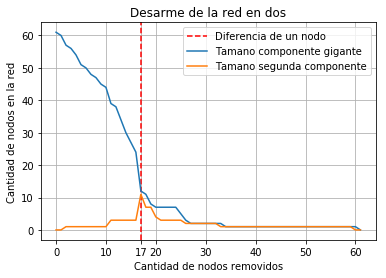

In [199]:
import operator

degrees = list(nx.degree(Red_delfines))
degree_dict = dict(degrees)

tamano_gigante = []
tamano_segunda = []

Red_rota = Red_delfines.copy()

i = 0
ganador = None

while Red_rota.number_of_nodes():
    node = max(degree_dict.items(), key=operator.itemgetter(1))[0]
    Red_rota.remove_node(node)
    componentes=[Red_rota.subgraph(componente) 
                      for componente in sorted(nx.connected_components(Red_rota), 
                                               key=len, reverse=True)]
    degrees = list(nx.degree(Red_rota))
    degree_dict = dict(degrees)
    
    if len(componentes) > 1:
        gigante = componentes[0]
        segunda = componentes[1]
        tamano_gigante.append(gigante.number_of_nodes())
        tamano_segunda.append(segunda.number_of_nodes())
        if not ganador:
            if gigante.number_of_nodes() <= segunda.number_of_nodes() + 1:
                ganador = i
            else:
                i = i + 1
    else:
        i = i + 1
        tamano_gigante.append(Red_rota.number_of_nodes())
        tamano_segunda.append(0)
    
    
   
    
x_values = np.append(np.arange(0, 65, step=10), [ganador])
fig, ax = plt.subplots()
ax.axvline(x = ganador, label = 'Diferencia de un nodo', color = 'r', ls = '--')
ax.plot(tamano_gigante, label = 'Tamano componente gigante')
ax.plot(tamano_segunda, label = 'Tamano segunda componente')
ax.set_xlabel('Cantidad de nodos removidos')
ax.set_ylabel('Cantidad de nodos en la red')
plt.title('Desarme de la red en dos')
plt.grid()
plt.xticks(ticks = x_values)
plt.legend()
plt.show()     
        


Con nuestra heurística consideramos que ambas tenían tamaño comparable cuando, al sacar 17 nodos, tenían 1 nodo de diferencia de tamaño. En el paso anterior (16 nodos removidos), la diferencia era de 21. 
Para comparar la estrategia elegida con un desarme al azar, quitamos nodos de manera aleatoria en 1000 iteraciones. Utlizamos el mismo criterio, es decir, consideramos de tamaño comparable cuando ambas tenían un nodo de diferencia. Se podría mejorar este criterio viendo el salto entre pasos sucesivos o tomando como tamaño comparable alguna diferencia proporcional a su tamaño actual. 

Realizamos un histograma con la cantidad de nodos a remover necesarios para cumplir con el criterio.

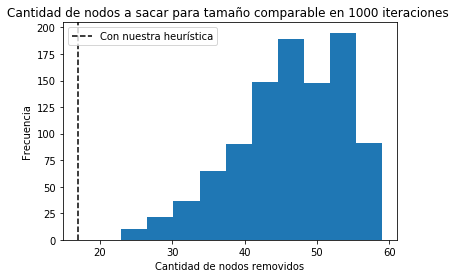

In [197]:
times = 1000
valores = []
nodos_ganadores = []

for _ in range(times): 
    j = 0
    nodos_removidos = []
    Red_rota_rand = Red_delfines.copy()
    nodes = list(Red_rota_rand.nodes)
    son_iguales = None
    while Red_rota_rand.number_of_nodes():
        node = random.sample(nodes, 1)[0]
        nodos_removidos.append(node)
        nodes.remove(node)
        Red_rota_rand.remove_node(node)
        componentes=[Red_rota_rand.subgraph(componente) 
                          for componente in sorted(nx.connected_components(Red_rota_rand), 
                                                   key=len, reverse=True)];
        if len(componentes) > 1:
            gigante = componentes[0]
            segunda = componentes[1]
            if not son_iguales: 
                if gigante.number_of_nodes() <= segunda.number_of_nodes() + 1:
                    #print(f'Valor de j:{j} \n Nodos_removidos: {len(nodos_removidos)}')
                    valores.append(j)
                    son_iguales = True
                    if len(nodos_removidos) < linea:
                        nodos_ganadores.append(nodos_removidos)
                    continue
        j = j + 1
            
        
fig, ax = plt.subplots()
plt.hist(valores)
ax.axvline(x = ganador, label = 'Con nuestra heurística', color = 'k', ls = '--')
ax.set_xlabel('Cantidad de nodos removidos')
ax.set_ylabel('Frecuencia')
plt.title(f'Cantidad de nodos a sacar para tamaño comparable en {times} iteraciones ')
plt.legend()
plt.show()

Acá mostramos un ejemplo de desarme random. 

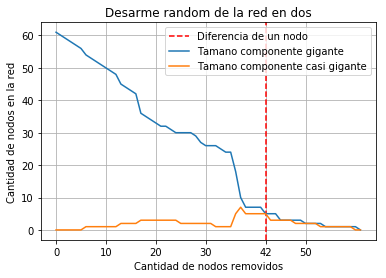

In [196]:
tamano_gigante_rand = []
tamano_segunda_rand = []
Red_rota_rand = Red_delfines.copy()
nodes = list(Red_rota_rand.nodes)

ganador_rand = None
j = 0

for node in nodes:
    Red_rota_rand.remove_node(node)
    componentes=[Red_rota_rand.subgraph(componente) 
                      for componente in sorted(nx.connected_components(Red_rota_rand), 
                                               key=len, reverse=True)];
    if len(componentes) > 1:
        gigante = componentes[0]
        segunda = componentes[1]
        tamano_gigante_rand.append(gigante.number_of_nodes())
        tamano_segunda_rand.append(segunda.number_of_nodes())
        
        if not ganador_rand:
            if gigante.number_of_nodes() <= segunda.number_of_nodes() + 1:
                ganador_rand = j
            else:
                j = j + 1
    else:
        j = j + 1
        tamano_gigante_rand.append(Red_rota_rand.number_of_nodes())
        tamano_segunda_rand.append(0)
        


    
x_values = np.append(np.arange(0, 60, step=10), [ganador_rand])
new_x = np.delete(x_values, np.where(x_values == 40)) #mejor lectura del grafico
fig, ax = plt.subplots()
ax.axvline(x = ganador_rand, label = 'Diferencia de un nodo', color = 'r', ls = '--')
ax.plot(tamano_gigante_rand, label = 'Tamano componente gigante')
ax.plot(tamano_segunda_rand, label = 'Tamano componente casi gigante')
ax.set_xlabel('Cantidad de nodos removidos')
ax.set_ylabel('Cantidad de nodos en la red')
plt.title('Desarme random de la red en dos')
plt.grid()
plt.xticks(ticks = new_x)
plt.legend()
plt.show()


Para este quite aleatorio en particular se tarda más del doble en llegar a redes de tamaño comparable (y por ende más pequeñas) que con el desarme propuesto al principio.

# Ejercicio 4
La idea principal de este ejercicio es estudiar si en las redes propuestas (ojo, la red de colaboraciones es una red pesada) existe asortatividad en el grado. Más en general, comprender cuál es el grado medio de los vecinos de un nodo, en función del grado de este nodo. A su vez, se pide que se repita el análisis para las redes de proteínas vistas anteriormente.

### Inciso (a)
Para este inciso, es importante entender los pasos necesarios para llevar acabo la tarea pedida. Entendemos que, en primer lugar, es recomendable trabajar con el diccionario de nodos y sus respesctivos grados antes que una lista de grados (pensar, de forma alternativa, si puede ser útil trabajar con un diccionario cuyas llaves -keys- sean los distintos grados y los valores -values- listas de nodos con determinado grado). A su vez, para tener acceso a los vecinos de un nodo, podemos hacer uso de la matriz de adyacencia de la red, pero también tenemos una función de la librería networkx que nos permite acceder a un iterable con los vecinos de determinado nodo:



```
# Opción 1
vecinos_nodo_i = Red.neighbors(i) # donde Red es un nx.Graph() e i un nodo cualquiera

# Opción 2
vecinos_nodo_i = Red[i] # ojo porque acá obtenemos un diccionario donde podemso tener información sobre el enlace entre el nodo i y sus vecinos (por ejemplo el peso)
```
La idea final es que estudiemos la relación entre el grado medio de los vecinos de los nodos de grado k en función de k. El estudio de esta relación se debe hacer en base a los dos modelos propuestos (Newman y Barabasai) sobre el origen de la asortatividad.

## Inciso (b)
Repetir lo anterior pero para las redes de proteínas



##4) i.


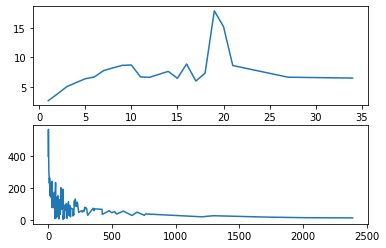

In [0]:
import numpy as np
Red_netscience = nx.read_gml('/content/netscience.gml')
Red_asjuly06 = nx.read_gml('/content/as-22july06.gml')


def asort(Red):
	asortatividad={} 
	for nodo_i in Red.nodes():
		#Calculo grado del nodo i
		grado_i=Red.degree[nodo_i]

		grado_vecinos_i=[]
		vecinos_nodo_i = Red.neighbors(nodo_i) # G.neighbors(node) devuelve un iterator
		for vecino in vecinos_nodo_i:
		  grado_vecinos_i.append(Red.degree[vecino])
		
		if len(grado_vecinos_i)==0: #no podemos hacer la media de un array vacio
			grado_medio_vecinos_i=0
		else:
			grado_medio_vecinos_i=np.mean(grado_vecinos_i)

		#Si ya existe la key con el grado, le appendeo el nuevo valor medio
		if grado_i in asortatividad:
			asortatividad[grado_i].append(grado_medio_vecinos_i)
		#Si no, creo la key
		else:	
			asortatividad[grado_i]=[grado_medio_vecinos_i]
	#Para cada grado calculo el promedio del promedio de los grados de los vecinos de cada nodo
	for grado in asortatividad:
		asortatividad[grado]=np.mean(asortatividad[grado])

	lists= sorted(asortatividad.items()) # sorted by key, return a list of tuples
	x, y = zip(*lists) # unpack a list of pairs into two tuples

	#Saco el grado 0 si es que existe porque no aporta informacion y complica el analisis posterior con logaritmos
	if x[0]==0:
		x, y = x[1:],y[1:]

	return(x,y)

asortatividad_netscience=asort(Red_netscience)
asortatividad_asjuly06=asort(Red_asjuly06)

plt.figure(1)
plt.subplot(211)
plt.plot(asortatividad_netscience[0],asortatividad_netscience[1])
plt.subplot(212)
plt.plot(asortatividad_asjuly06[0],asortatividad_asjuly06[1])
plt.show()

##ii.

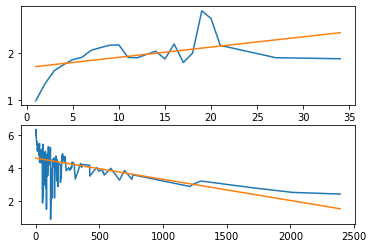

In [0]:
def exponente_correlacion(asortatividad):
	z=np.polyfit(asortatividad[0], np.log(asortatividad[1]), 1)
	p=np.poly1d(z)
	mu=z[1]
	#devuelve mu (factor de correlacion) y el fit lineal p
	return(mu,p)

plt.figure(1)
plt.subplot(211)
x_netscience=asortatividad_netscience[0]
y_netscience=np.log(asortatividad_netscience[1])

mu_netscience,p_netscience=exponente_correlacion(asortatividad_netscience)
fit_netscience=p_netscience(asortatividad_netscience[0])

plt.plot(x_netscience,y_netscience)
plt.plot(x_netscience,fit_netscience)


plt.subplot(212)
x_asjuly06=asortatividad_asjuly06[0]
y_asjuly06=np.log(asortatividad_asjuly06[1])

mu_asjuly06,p_asjuly06=exponente_correlacion(asortatividad_asjuly06)
fit_asjuly06=p_asjuly06(asortatividad_asjuly06[0])

plt.plot(x_asjuly06,y_asjuly06)
plt.plot(x_asjuly06,fit_asjuly06)
plt.show()

#No entiendo como es que ambos modelos podrian aplicar en simultaneo si uno es una exponencial y el otro es una lineal.
#Para obtener el u hay que tomar logaritmo de k_nn(k) y con eso fitear con una lineal 

##iii.


##iv.

In [0]:
Se, S1, S2, S3=0, 0, 0, 0
for enlace in Red_netscience.edges():
	nodo_i=enlace[0]
	nodo_j=enlace[1]
	#Sumatoria sobre los enlaces distintos, de 2 ki kj
	Se += 2*Red_netscience.degree[nodo_i]*Red_netscience.degree[nodo_j] 

for nodo in Red_netscience.nodes():
	S1+=Red_netscience.degree[nodo]
	S2+=Red_netscience.degree[nodo]**2
	S3+=Red_netscience.degree[nodo]**3

r= (S1*Se - S2*S2)/ (S1*S3-S2*S2)

print(Se, S1, S2, S3)
print(r)

350220 5484 38052 450738
0.4616224667525835
